In [26]:
import numpy as np

# Define the attribute names and the target attribute
attributes = ["Age", "Income", "Student", "Credit_Rating", "Buys_Computer"]

# Create a numpy array to store the dataset
data = np.array([
    ["young", "high", "no", "fair", "no"],
    ["young", "high", "no", "excellent", "no"],
    ["middle-aged", "high", "no", "fair", "yes"],
    ["senior", "medium", "no", "fair", "yes"],
    ["senior", "low", "yes", "fair", "yes"],
    ["senior", "low", "yes", "excellent", "no"],
    ["middle-aged", "low", "yes", "excellent", "yes"],
    ["young", "medium", "no", "fair", "no"],
    ["young", "low", "yes", "fair", "yes"],
    ["senior", "medium", "yes", "fair", "yes"],
    ["young", "medium", "yes", "excellent", "yes"],
    ["middle-aged", "medium", "no", "excellent", "yes"],
    ["middle-aged", "high", "yes", "fair", "yes"],
    ["senior", "medium", "no", "excellent", "no"]
])

# Function to calculate entropy of a column in the dataset
def calculate_entropy(data, column):
    # Find unique values and their counts in the column
    unique_values, counts = np.unique(data[:, column], return_counts=True)
    
    # Calculate probabilities of each unique value
    probabilities = counts / len(data)
    
    # Calculate entropy using the formula: -Σ(p * log2(p))
    entropy = -np.sum(probabilities * np.log2(probabilities))
    
    return entropy

# Dictionary to store entropy values for each attribute
entropy_values = {}

# Calculate entropy for each attribute
for column in range(data.shape[1] - 1):
    entropy_values[attributes[column]] = calculate_entropy(data, column)

# Determine the attribute with the highest entropy (the one to split on)
selected_attribute = max(entropy_values.items(), key=lambda item: item[1])[0]

# Print the calculated entropy values for each attribute
print("Entropy of each attribute / feature:")
for attribute, entropy_value in entropy_values.items():
    print(f"{attribute}: {entropy_value:.3f}")

# Print the attribute selected for constructing the decision tree (highest entropy)
print("First feature to be selected for constructing the decision tree:")
print(f"{selected_attribute}: {entropy_values[selected_attribute]:.3f}")

Entropy of each attribute / feature:
Age: 1.577
Income: 1.557
Student: 1.000
Credit_Rating: 0.985
First feature to be selected for constructing the decision tree:
Age: 1.577


In [27]:
import numpy as np
import pandas as pd
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# Define the initial dataset
data = [
    ["young", "high", "no", "fair", "no"],
    ["young", "high", "no", "excellent", "no"],
    ["middle-aged", "high", "no", "fair", "yes"],
    ["senior", "medium", "no", "fair", "yes"],
    ["senior", "low", "yes", "fair", "yes"],
    ["senior", "low", "yes", "excellent", "no"],
    ["middle-aged", "low", "yes", "excellent", "yes"],
    ["young", "medium", "no", "fair", "no"],
    ["young", "low", "yes", "fair", "yes"],
    ["senior", "medium", "yes", "fair", "yes"],
    ["young", "medium", "yes", "excellent", "yes"],
    ["middle-aged", "medium", "no", "excellent", "yes"],
    ["middle-aged", "high", "yes", "fair", "yes"],
    ["senior", "medium", "no", "excellent", "no"]
]

# Define the possible unique values for each categorical feature
age_values = ["young", "middle-aged", "senior"]
income_values = ["high", "medium", "low"]
student_values = ["no", "yes"]
credit_rating_values = ["fair", "excellent"]

# Function to generate random categorical values
def generate_random_categorical_value(values):
    return random.choice(values)

# Generate random values for each categorical feature
random_age = generate_random_categorical_value(age_values)
random_income = generate_random_categorical_value(income_values)
random_student = generate_random_categorical_value(student_values)
random_credit_rating = generate_random_categorical_value(credit_rating_values)

# Create a random data point with an unknown label
data_point = [random_age, random_income, random_student, random_credit_rating, "unknown"]

# Append the random data point to the existing dataset
data.append(data_point)

# Convert the data list to a NumPy array
data = np.array(data)

# Define column names for the DataFrame
columns = ["age", "income", "student", "credit_rating", "buys_computer"]

# Define the categorical features in the dataset
categorical_features = ["age", "income", "student", "credit_rating"]

# Create a new DataFrame from the updated data with column names
df = pd.DataFrame(data, columns=columns)

# Split the data into features (X) and target (y)
X = df.drop("buys_computer", axis=1)
y = df["buys_computer"]

# Create a preprocessor to one-hot encode the categorical features
preprocessor = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(), categorical_features)],
    remainder="passthrough",
)

# Create a pipeline to combine the preprocessor and a Decision Tree classifier
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier()),
])

# Fit the pipeline to the data
pipeline.fit(X, y)

# Get the depth of the decision tree
tree_depth = pipeline.named_steps["classifier"].get_depth()

# Print the tree depth
print(f"Tree depth: {tree_depth}")

Tree depth: 4


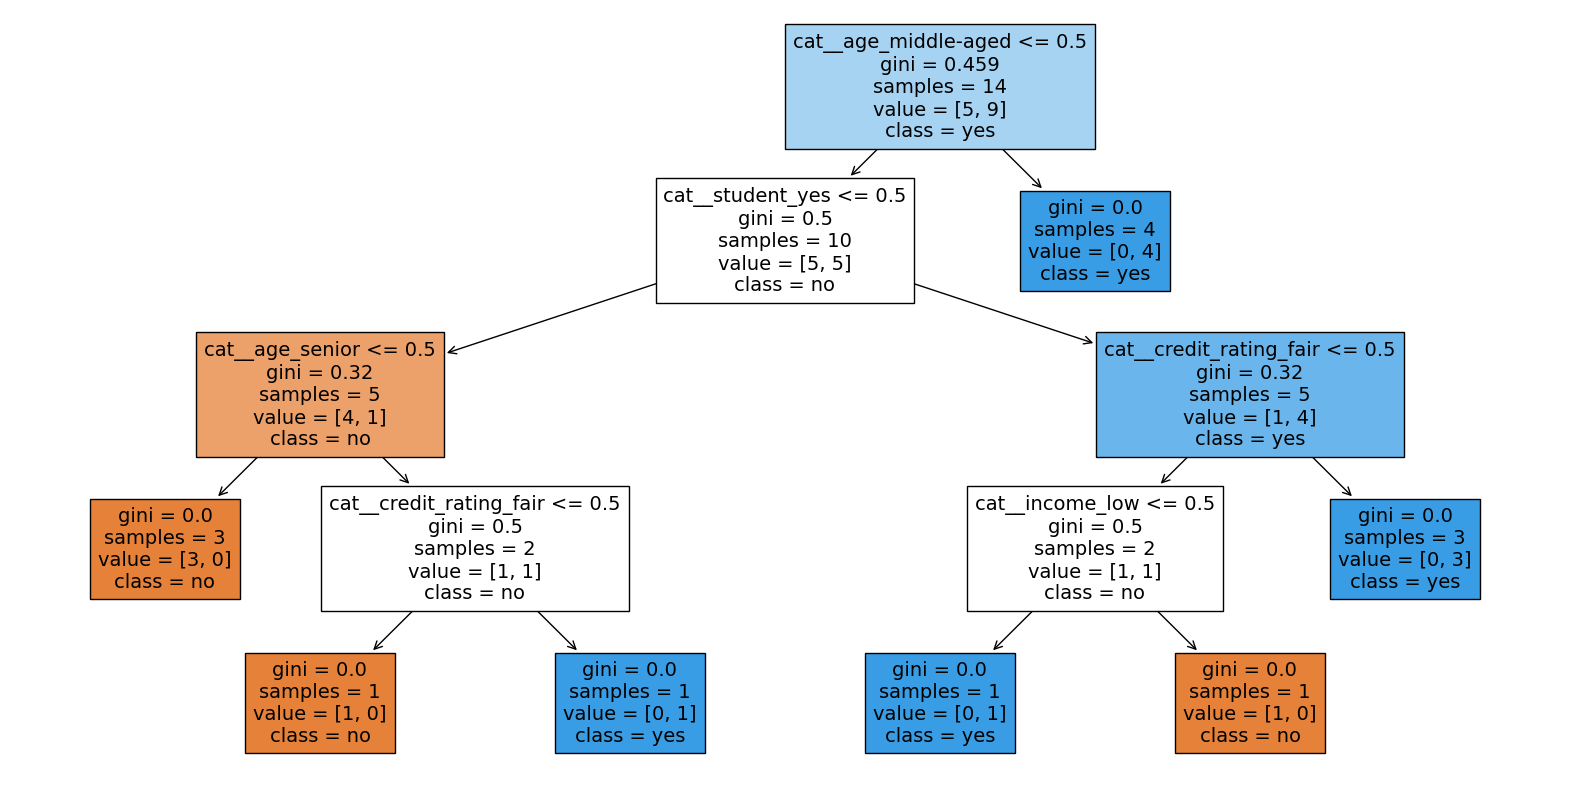

In [10]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Sample data
custom_data = [
    ["young", "high", "no", "fair", "no"],
    ["young", "high", "no", "excellent", "no"],
    ["middle-aged", "high", "no", "fair", "yes"],
    ["senior", "medium", "no", "fair", "yes"],
    ["senior", "low", "yes", "fair", "yes"],
    ["senior", "low", "yes", "excellent", "no"],
    ["middle-aged", "low", "yes", "excellent", "yes"],
    ["young", "medium", "no", "fair", "no"],
    ["young", "low", "yes", "fair", "yes"],
    ["senior", "medium", "yes", "fair", "yes"],
    ["young", "medium", "yes", "excellent", "yes"],
    ["middle-aged", "medium", "no", "excellent", "yes"],
    ["middle-aged", "high", "yes", "fair", "yes"],
    ["senior", "medium", "no", "excellent", "no"]
]

# Define column names
custom_columns = ["age", "income", "student", "credit_rating", "buys_computer"]

# Create a DataFrame from the custom data
custom_df = pd.DataFrame(custom_data, columns=custom_columns)

# Split the data into features and target
X_custom = custom_df.drop("buys_computer", axis=1)
y_custom = custom_df["buys_computer"]

# Categorical features for one-hot encoding
custom_categorical_features = ["age", "income", "student", "credit_rating"]

# Create a ColumnTransformer for preprocessing
custom_preprocessor = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(), custom_categorical_features)],
    remainder="passthrough"
)

# Create a Pipeline
custom_pipeline = Pipeline([
    ("preprocessor", custom_preprocessor),
    ("classifier", DecisionTreeClassifier())
])

# Fit the Pipeline to the custom data
custom_pipeline.fit(X_custom, y_custom)

# Get feature names after one-hot encoding
custom_feature_names = list(custom_pipeline.named_steps["preprocessor"].get_feature_names_out(input_features=custom_categorical_features)) + list(X_custom.columns.drop(custom_categorical_features))

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(custom_pipeline.named_steps["classifier"], filled=True, feature_names=custom_feature_names, class_names=['no', 'yes'])
plt.show()

Training Set Accuracy: 0.9778172138420586
Test Set Accuracy: 0.9571428571428572


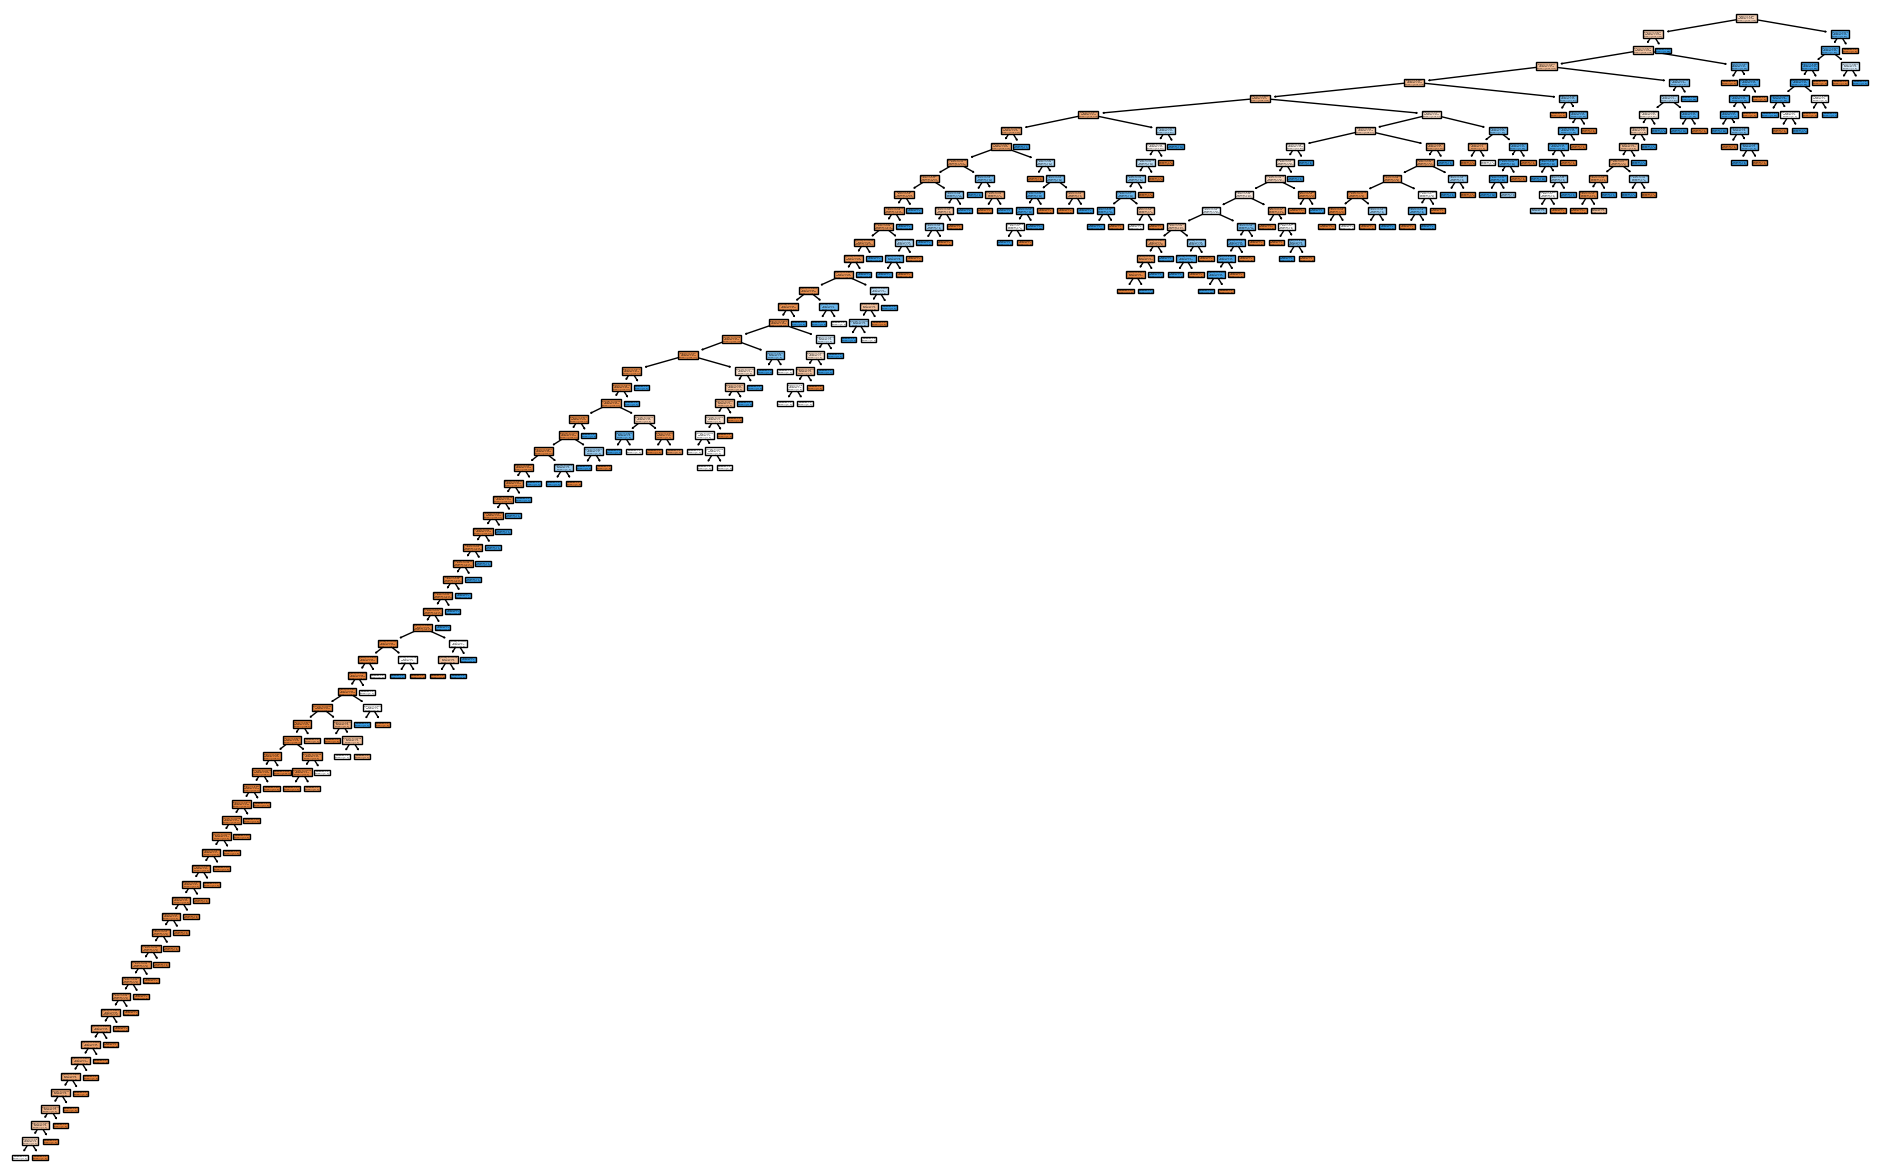

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the training and testing data
training_data = pd.read_excel('training (3).xlsx')
testing_data = pd.read_excel('testing (3).xlsx')

# Fill in any missing values
training_data['input'].fillna('', inplace=True)
testing_data['Equation'].fillna('', inplace=True)

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Transform the training and testing data into feature vectors
Tr_X = vectorizer.fit_transform(training_data['input'])
Te_X = vectorizer.transform(testing_data['Equation'])

# Extract the target variables
Tr_y = training_data['Classification']
Te_y = testing_data['Classification']

# Create a DecisionTreeClassifier object
model = DecisionTreeClassifier()

# Fit the model to the training data
model.fit(Tr_X, Tr_y)

# Calculate the training and testing accuracy
training_accuracy = model.score(Tr_X, Tr_y)
test_accuracy = model.score(Te_X, Te_y)

# Print the training and testing accuracy
print("Training Set Accuracy:", training_accuracy)
print("Test Set Accuracy:", test_accuracy)

# Plot the Decision Tree without specifying feature_names and class_names
plt.figure(figsize=(24, 15))
plot_tree(model, filled=True)
plt.show()

Training Set Accuracy: 0.7604259094942325
Test Set Accuracy: 0.6571428571428571


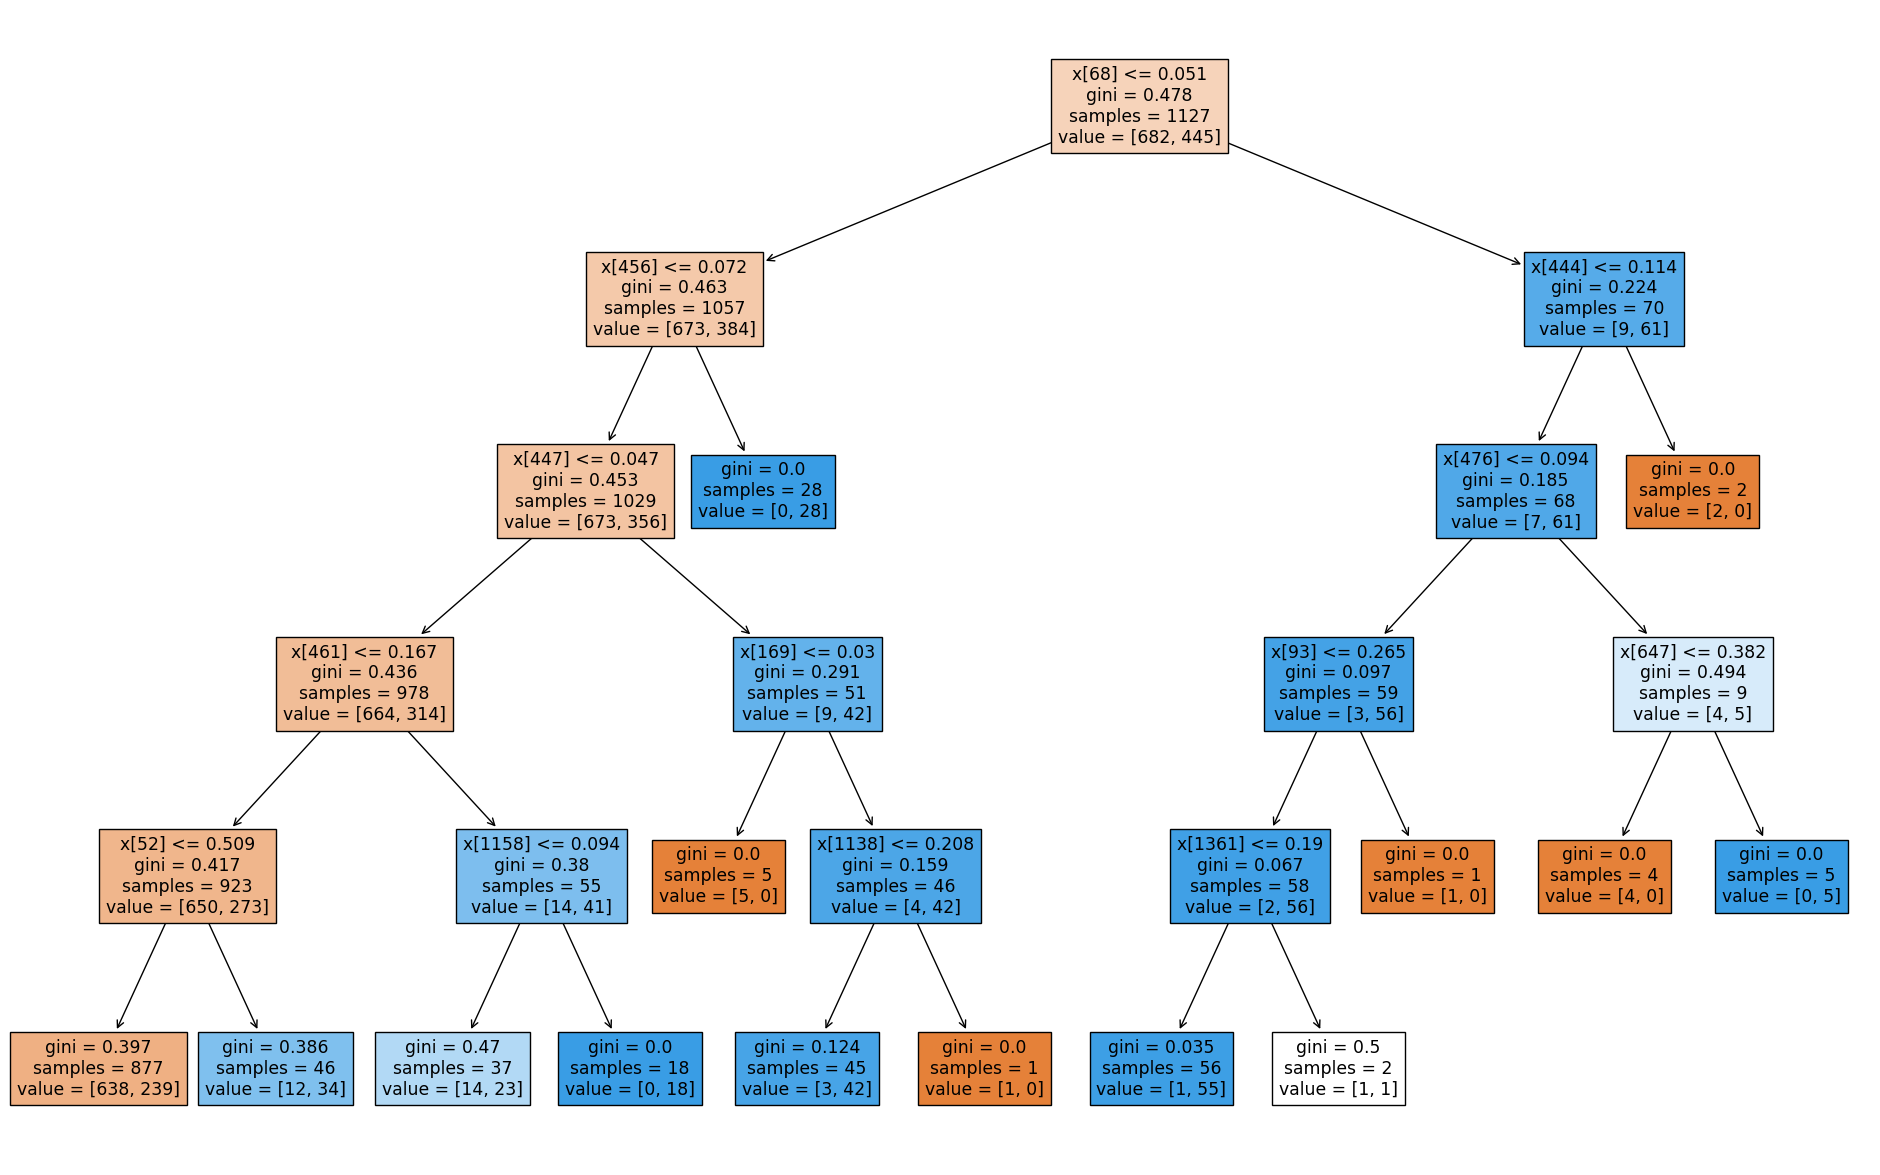

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the training and testing data
training_data = pd.read_excel('training (3).xlsx')
testing_data = pd.read_excel('testing (3).xlsx')

# Fill in any missing values
training_data['input'].fillna('', inplace=True)
testing_data['Equation'].fillna('', inplace=True)

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Transform the training and testing data into feature vectors
Tr_X = vectorizer.fit_transform(training_data['input'])
Te_X = vectorizer.transform(testing_data['Equation'])

# Extract the target variables
Tr_y = training_data['Classification']
Te_y = testing_data['Classification']

# Create a DecisionTreeClassifier object with a max_depth constraint of 5
model = DecisionTreeClassifier(max_depth=5)

# Fit the model to the training data
model.fit(Tr_X, Tr_y)

# Calculate the training and testing accuracy
training_accuracy = model.score(Tr_X, Tr_y)
test_accuracy = model.score(Te_X, Te_y)

# Print the training and testing accuracy
print("Training Set Accuracy:", training_accuracy)
print("Test Set Accuracy:", test_accuracy)

# Plot the Decision Tree without specifying feature_names and class_names
plt.figure(figsize=(24, 15))
plot_tree(model, filled=True)
plt.show()

Training Set Accuracy (with default criterion): 0.7577639751552795
Test Set Accuracy (with default criterion): 0.7


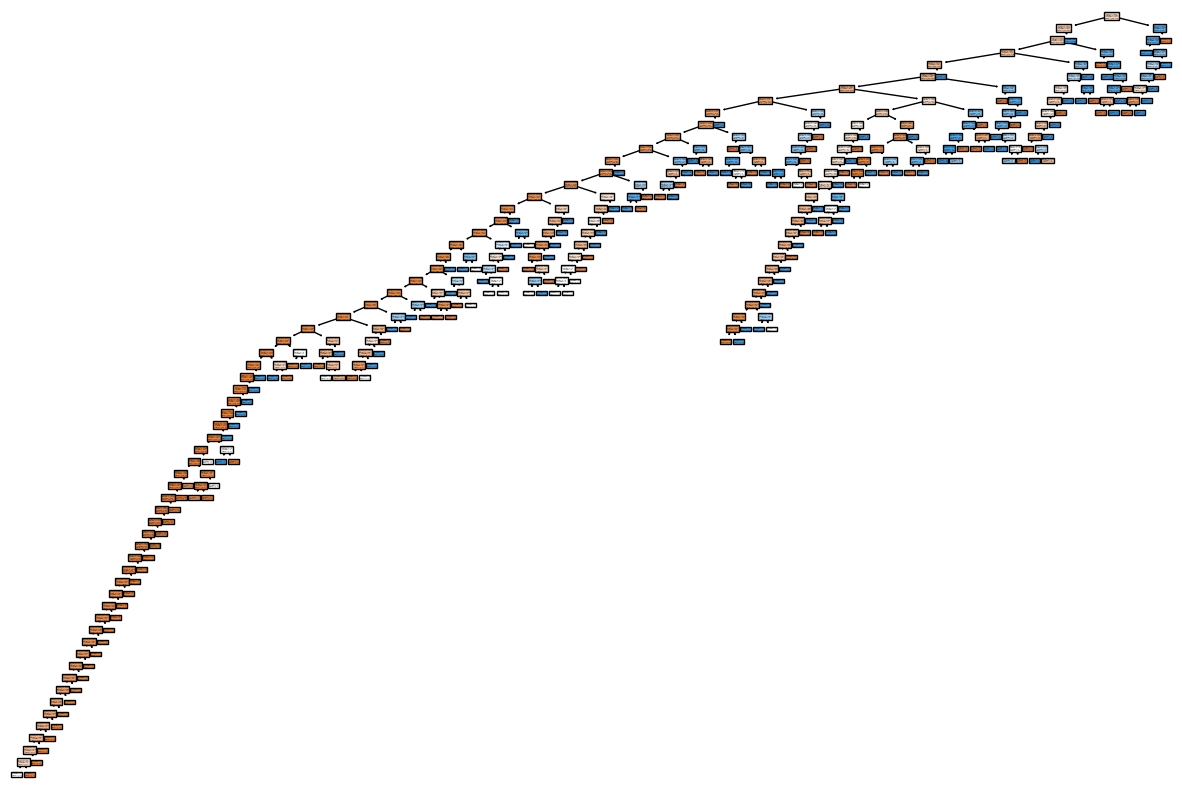


Training Set Accuracy (with 'entropy' criterion): 0.7542147293700089
Test Set Accuracy (with 'entropy' criterion): 0.6857142857142857


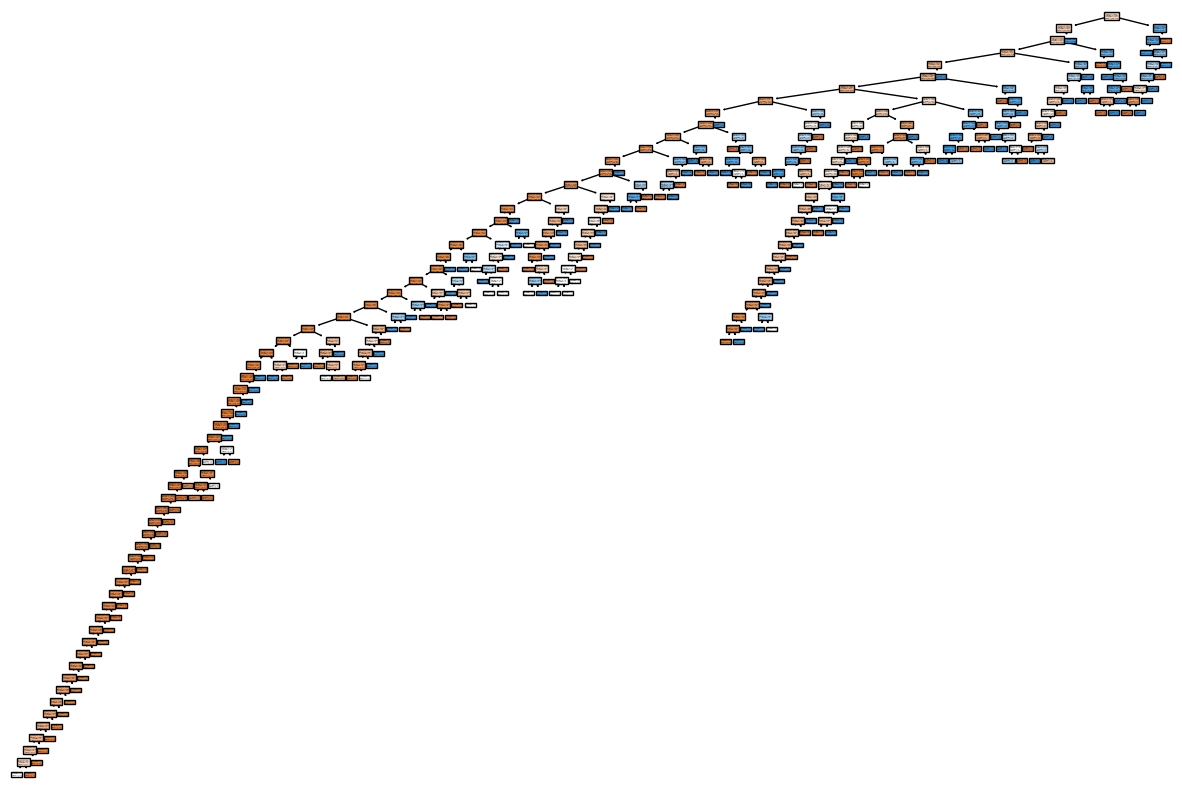

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

# Load the training and testing data from Excel files
training_data = pd.read_excel('training (3).xlsx')
testing_data = pd.read_excel('testing (3).xlsx')

# Fill missing values in the 'input' and 'Equation' columns with empty strings
training_data['input'].fillna('', inplace=True)
testing_data['Equation'].fillna('', inplace=True)

# Create a CountVectorizer to transform text data into numerical features
vectorizer = CountVectorizer()

# Transform the training and testing text data into numerical features
Tr_X = vectorizer.fit_transform(training_data['input'])
Te_X = vectorizer.transform(testing_data['Equation'])

# Get the target labels for training and testing data
Tr_y = training_data['Classification']
Te_y = testing_data['Classification']

# Train the Decision Tree classifier on the training data with default criterion
model_default.fit(Tr_X, Tr_y)

# Evaluate and print the accuracy on the training and test data with default criterion
training_accuracy_default = model_default.score(Tr_X, Tr_y)
test_accuracy_default = model_default.score(Te_X, Te_y)
print("Training Set Accuracy (with default criterion):", training_accuracy_default)
print("Test Set Accuracy (with default criterion):", test_accuracy_default)

# Plot the Decision Tree with filled nodes and specified class names for default criterion
plt.figure(figsize=(15, 10))
plot_tree(model, filled=True)
plt.show()

# Train the Decision Tree classifier on the training data with 'entropy' criterion
model_entropy.fit(Tr_X, Tr_y)

# Evaluate and print the accuracy on the training and test data with 'entropy' criterion
training_accuracy_entropy = model_entropy.score(Tr_X, Tr_y)
test_accuracy_entropy = model_entropy.score(Te_X, Te_y)
print("\nTraining Set Accuracy (with 'entropy' criterion):", training_accuracy_entropy)
print("Test Set Accuracy (with 'entropy' criterion):", test_accuracy_entropy)

# Plot the Decision Tree with filled nodes and specified class names for 'entropy' criterion
plt.figure(figsize=(15, 10))
plot_tree(model, filled=True)
plt.show()

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Load your project's training and testing data
# Replace 'training_data.csv' and 'testing_data.csv' with your data file names
training_data = pd.read_excel('training (3).xlsx')
testing_data = pd.read_excel('testing (3).xlsx')

# Fill in any missing values
training_data.fillna('', inplace=True)
testing_data.fillna('', inplace=True)

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Transform the training and testing data into feature vectors
X_train = vectorizer.fit_transform(training_data['input'])
X_test = vectorizer.transform(testing_data['Equation'])

# Extract the target variables
y_train = training_data['Classification']
y_test = testing_data['Classification']

# Create a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Predict on the training and testing data
train_preds = rf_model.predict(X_train)
test_preds = rf_model.predict(X_test)

# Calculate accuracy on the training and testing data
training_accuracy = accuracy_score(y_train, train_preds)
testing_accuracy = accuracy_score(y_test, test_preds)

# Print the training and testing accuracy
print("Training Set Accuracy:", training_accuracy)
print("Test Set Accuracy:", testing_accuracy)

# Generate a classification report for testing data
report = classification_report(y_test, test_preds)
print("\nClassification Report for Testing Data:\n", report)

# Generate a confusion matrix for testing data
confusion = confusion_matrix(y_test, test_preds)
print("\nConfusion Matrix for Testing Data:\n", confusion)

# Feature importance in Random Forest
feature_importance = rf_model.feature_importances_
feature_names = vectorizer.get_feature_names_out()
features = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
features = features.sort_values(by='Importance', ascending=False)
print("\nTop 10 Feature Importance:")
print(features.head(10))

Training Set Accuracy: 0.9778172138420586
Test Set Accuracy: 0.9571428571428572

Classification Report for Testing Data:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.96      0.93      0.94        27

    accuracy                           0.96        70
   macro avg       0.96      0.95      0.95        70
weighted avg       0.96      0.96      0.96        70


Confusion Matrix for Testing Data:
 [[42  1]
 [ 2 25]]

Top 10 Feature Importance:
     Feature  Importance
822       b2    0.025063
52        12    0.022265
476      4ac    0.021406
68       12b    0.019328
85        14    0.016449
447      480    0.014682
753       a2    0.014633
265       2a    0.013899
1203   roots    0.013680
642       71    0.012592
